In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [ ]:
df = pd.read_csv("Gandum.csv", header = None,names = ["id","Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"])

In [ ]:
df.info()
# Dari sini didapatkan informasi jika semua kolom bertipe numerik dan tidak ada data null

In [ ]:
df.head()

In [ ]:
# NO 1

# Karena semua kolom pada tabel bersifat numerik, maka gunakan semua kolom untuk deskripsi statistik
atribut = df.drop(["id", "Kelas"], axis=1) 

st = pd.DataFrame()                                           # Data statistik
st["Mean"] = atribut.mean()                                   # Rataan
st["Median"] = atribut.median()                               # Median
st["Modus"] = atribut.mode().iloc[0]                          # Modus
st["Std"] = atribut.std()                                     # Simpangan Baku
st["Var"] = atribut.var()                                     # Variansi
st["Range"] = atribut.max() - atribut.min()                   # Jangkauan
st["Min"] = atribut.min()                                     # Nilai Minimum
st["Max"] = atribut.max()                                     # Nilai Maksimum
st["Q1"] = atribut.quantile(0.25)                             # Kuartile 1
st["Q2"] = atribut.quantile(0.5)                              # Kuartile 2
st["Q3"] = atribut.quantile(0.75)                             # Kuartile 3
st["IQR"] = atribut.quantile(0.75) - atribut.quantile(0.20)   # Interquartile range
st["Skew"] = atribut.skew()                                   # Skewness
st["Kurt"] = atribut.kurt()                                   # Kurtosis

T = st.transpose()    # Biar tampilannya bagus, ditranspose dulu
T.round(3)

In [ ]:
# Tambahan No 1
# Karena data modus ada banyak, maka tampilkan semua
atribut.mode()

In [ ]:
# No 2
# Fungsi menampilkan histogram dan boxplot
def show_hist_box(nama_kolom):
    plt.subplot(1, 2, 1)
    df[nama_kolom].plot(kind="hist",rwidth=0.9,figsize=(9,4), bins=15)
    plt.title(nama_kolom)
    plt.xlabel("Nilai")
    plt.ylabel("Banyak")

    plt.subplot(1, 2, 2)
    df[nama_kolom].plot(kind="box", vert=False) # Biar horizontal
    plt.title(nama_kolom)
    plt.xlabel("Nilai")
    plt.yticks(ticks=[0])

    plt.tight_layout()
    plt.show()

In [ ]:
show_hist_box("Daerah")
# Uraian


In [ ]:
show_hist_box("SumbuUtama")
# Uraian


In [ ]:
show_hist_box("SumbuKecil")
# Uraian


In [ ]:
show_hist_box("Keunikan")
# Uraian


In [ ]:
show_hist_box("AreaBulatan")
# Uraian


In [ ]:
show_hist_box("Diameter")
# Uraian


In [ ]:
show_hist_box("KadarAir")
# Uraian


In [ ]:
show_hist_box("Keliling")
# Uraian


In [ ]:
show_hist_box("Bulatan")
# Uraian


In [ ]:
show_hist_box("Ransum")
# Uraian


In [ ]:
# NO 3
# Fungsi untuk menentukan apakah suatu kolom numerik berdistribusi normal
def test_norm_dist(nama_kolom):
    alpha = 0.05
    print("Menggunakan D’Agostino’s K-squared Test")
    stat, p_value = stats.normaltest(df[nama_kolom])
    # print("Menggunakan Shapiro-Wilk Test")
    # stat, p_value = stats.shapiro(df[nama_kolom])
    print("alpha   = %.4f" %(alpha))
    print("p_value = %.4f" %(p_value))
    print("Hasil :")
    if (p_value > alpha):
        print("Kolom %s Berdistribusi Normal" %(nama_kolom))
    else:
        print("Kolom %s Tidak Berdistribusi Normal" %(nama_kolom))

    plt.subplots()
    df[nama_kolom].plot.hist(density="True",rwidth=0.90, color="lightskyblue",bins=15)
    df[nama_kolom].plot.kde(color="tab:blue")
    plt.title(nama_kolom)
    plt.xlabel("Nilai")

    plt.show()



In [ ]:
test_norm_dist("Daerah")

In [ ]:
test_norm_dist("SumbuUtama")

In [ ]:
test_norm_dist("SumbuKecil")

In [ ]:
test_norm_dist("Keunikan")

In [ ]:
test_norm_dist("AreaBulatan")

In [ ]:
test_norm_dist("Diameter")

In [ ]:
test_norm_dist("KadarAir")

In [ ]:
test_norm_dist("Keliling")

In [ ]:
test_norm_dist("Bulatan")

In [ ]:
test_norm_dist("Ransum")

In [ ]:
df.plot.scatter(x = "Daerah", y = "Kelas")

In [ ]:
# NO 4
# Diasumsikan bahwa populasi berdistribusi normal, variansi populasi tidak diketahui

In [ ]:
# NO 4a
print("Nilai rata-rata Daerah di atas 4700?")
# Langkah Uji Hipotesis
#1 H0 : mu = 4700
#2 H1 : mu > 4700
mu = 4700
n = df.shape[0]

#3 Tingkat signifikan
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
# Uji statistik menggunakan T-Test
# Daerah kritis, t > t_alpha
v = n - 1                # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha,v)   # titik kritis


#5 Hitung nilai uji statistik dan hitung p_value
t, p_value = stats.ttest_1samp(df["Daerah"], mu)
p_value = p_value/2     # Bagi 2 karena yang direturn adalah p-value untuk 2 tail

#6 Ambil keputusan
print("\nHasil : ")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : t > %.4f" %(t_alpha))
print("t = %.4f" %(t))
if (t > t_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika nilai rata-rata Daerah di atas 4700")
else:
    print("Jadi, TIDAK BENAR jika nilai rata-rata Daerah di atas 4700")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
df["Daerah"].plot(kind="box")
plt.tight_layout()
plt.show()

In [ ]:
# NO 4b

In [ ]:
# NO 4c
print("Nilai Rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50?")
# Langkah Uji Hipotesis
#1 H0 : mu = 50
#2 H1 : mu != 50
mu = 50
n = 20

#3 Tingkat signifikan
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
# Uji statistik menggunakan T-Test
# Daerah kritis, t < -t_alpha/2 atau t > t_alpha/2
v = n - 1                       # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha/2,v)   # titik kritis

#5 Hitung nilai uji statistik dan hitung p_value
t, p_value = stats.ttest_1samp(df["SumbuKecil"].head(20), mu)
p_value = p_value/2     # Bagi 2 karena yang direturn adalah p-value untuk 2 tail
# print(1-stats.t.cdf(t,v))

#6 Ambil keputusan
print("\nHasil : ")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : t > %.4f atau t < -%.4f" %(t_alpha,t_alpha))
print("t = %.4f" %(t))
if (t < -t_alpha or t > t_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50")
else:
    print("Jadi, TIDAK BENAR jika nilai rata-rata 20 baris pertama kolom Sumbu Kecil bukan 50")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
df["SumbuKecil"].head(20).plot(kind="box")
plt.tight_layout()
plt.show()

In [ ]:
# No 4d

Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%

Hasil : 
Daerah kritis : z < -1.6449
z = -5.1299
H0 DITOLAK karena nilai uji terletak di daerah kritis

Kesimpulan :
Jadi, BENAR jika proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%

Visualisasi Boxplot


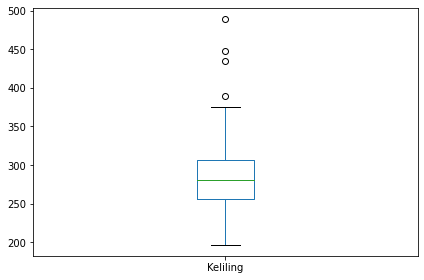

In [101]:
# No 4e
print("Proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")
# Langkah Uji Hipotesis
#1 H0 : p = 0.05
#2 H1 : p < 0.05
p = 0.05
n = df.shape[0] # Jumlah data
x = df[df["Keliling"] < 100].count()["Keliling"]

#3 Tingkat signifikan
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
# Uji statistik menggunakan Binomial didekati Normal
# Daerah kritis, z < -z_alpha
z_alpha = -stats.norm.ppf(1-alpha)   # titik kritis

#5 Hitung nilai uji statistik dan hitung p_value
z = (x-n*p)/math.sqrt(n*p*(1-p))

#6 Ambil keputusan
print("\nHasil : ")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis : z < %.4f" %(z_alpha))
print("z = %.4f" %(z))
if (z < z_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# Kesimpulan
print("\nKesimpulan :")
# Kesimpulan
if (tolak):
    print("Jadi, BENAR jika proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")
else:
    print("Jadi, TIDAK BENAR jika proporsi nilai Keliling yang kurang dari 100, adalah kurang dari 5%")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
df["Keliling"].plot(kind="box")
plt.tight_layout()
plt.show()

Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?

Hasil : 
Daerah kritis t > 1.9647
t = -26.9034
H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis
alpha   = 0.0500
p-value = 1.000000
H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha

Kesimpulan :
Jadi, TIDAK BENAR jika rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2

Visualisasi Boxplot


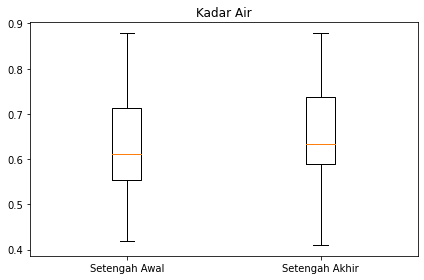

In [116]:
# No 5b
print("Data kolom Kadar Air dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2?")
# Simpangan baku populasi sama dan tidak diketahui

# Diketahui:
n = df.shape[0] # Jumlah data
first_half = df.loc[:n/2-1]
second_half = df.loc[n/2:]

# Langkah Uji Hipotesis
#1 H0 : mu1 - mu2 = 0.2
#2 H1 : mu1 - mu2 > 0.2
d0 = 0.2

#3 Tingkat signifikan
alpha = 0.05

#4 Uji Statistik dan Daerah Kritis
# Uji statistik menggunakan T-Test untuk dua sampel
# Daerah kritis, t > t_alpha
n1 = n/2
n2 = n/2
v = n1 + n2 - 2                       # derajat kebebasan
t_alpha = stats.t.ppf(1-alpha/2,v)      # titik kritis

#5 Hitung nilai uji statistik dan hitung p_value
x1 = first_half["KadarAir"].mean()
x2 = second_half["KadarAir"].mean()
std1 = first_half["KadarAir"].std()
std2 = second_half["KadarAir"].std()
sp = math.sqrt(((n1-1)*(std1**2) + (n2-1)*(std2**2))/(n1 + n2 - 2))
# Nilai uji statistik
t = ((x1-x2)-d0)/(sp*math.sqrt(1/n1 + 1/n2))
# p-value
p_value = 1 - stats.t.cdf(t,v)

#6 Ambil keputusan
print("\nHasil : ")
tolak = False
# TOLAK H0 jika nilai uji terletak di daerah kritis
print("Daerah kritis t > %.4f" %(t_alpha))
print("t = %.4f" %(t))
if (t > t_alpha):
    tolak = True
    print("H0 DITOLAK karena nilai uji terletak di daerah kritis")
else:
    print("H0 TIDAK DITOLAK karena nilai uji terletak di luar daerah kritis")

# TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi alpha
print("alpha   = %.4f" %(alpha))
print("p-value = %f" %(p_value))
if (p_value < alpha):
    tolak = True
    print("H0 DITOLAK karena p-value lebih kecil dibanding tingkat signifikansi alpha")
else:
    print("H0 TIDAK DITOLAK karena p-value lebih besar dibanding tingkat signifikansi alpha")

# Kesimpulan
print("\nKesimpulan :")
if (tolak):
    print("Jadi, BENAR jika rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2")
else:
    print("Jadi, TIDAK BENAR jika rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2")

# Tampilkan Boxplot
print("\nVisualisasi Boxplot")
plt.boxplot([first_half["KadarAir"], second_half["KadarAir"]])
plt.xticks(ticks=[1,2],labels=["Setengah Awal","Setengah Akhir"])
plt.title("Kadar Air")
plt.tight_layout()
plt.show()
